### Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import yaml
# Local Module Imports
import sys
import importlib

sys.path.insert(0, "../src")
import visualization

importlib.reload(visualization)
from visualization import create_boxplot

import utils

importlib.reload(utils)
from utils import get_files_dirs_ext

2024-01-10 13:39:50.167870: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-01-10 13:39:50.195605: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-10 13:39:50.195629: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-10 13:39:50.196385: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-10 13:39:50.202984: I tensorflow/core/platform/cpu_feature_guar

In [5]:
# Set base directory
BASE_DIR = os.path.dirname(os.getcwd())
# model output directory
OUTPUT_DIR = os.path.join(BASE_DIR, "outputs")

# Load 'config' file
config_file = os.path.join(BASE_DIR, "config.yml")
with open(config_file, "r", encoding="utf-8") as f:
    config = yaml.safe_load(f)

In [6]:
df_int_iou = pd.read_csv('interpol_iou.csv')
df_int_hd = pd.read_csv('interpol_hd.csv')
df_ext_70_hd = pd.read_csv('extrapol_70_hd.csv')
df_ext_90_hd = pd.read_csv('extrapol_90_hd.csv')
df_ext_70_iou = pd.read_csv('extrapol_70_iou.csv')
df_ext_90_iou = pd.read_csv('extrapol_90_iou.csv')

In [7]:
wkt_dirs = []

for dirpath, _, _ in os.walk(OUTPUT_DIR):
    if os.path.basename(dirpath) == "WKT":
        wkt_dirs.append(dirpath)

tc_csv = get_files_dirs_ext(wkt_dirs, ext="csv", return_paths=True)
tc_csv 

['/home/tiagociic/Projectos/spatiotemporal-vae-reconstruction/outputs/CVAE/extrapol/70/full/WKT/tc.csv',
 '/home/tiagociic/Projectos/spatiotemporal-vae-reconstruction/outputs/CVAE/extrapol/90/unet/WKT/tc.csv',
 '/home/tiagociic/Projectos/spatiotemporal-vae-reconstruction/outputs/CVAE/interpol/full/WKT/tc.csv',
 '/home/tiagociic/Projectos/spatiotemporal-vae-reconstruction/outputs/CVAE/interpol/sampled/WKT/tc.csv',
 '/home/tiagociic/Projectos/spatiotemporal-vae-reconstruction/outputs/shape/interpol/full/WKT/tc.csv',
 '/home/tiagociic/Projectos/spatiotemporal-vae-reconstruction/outputs/pstg/interpol/sampled/WKT/tc.csv',
 '/home/tiagociic/Projectos/spatiotemporal-vae-reconstruction/outputs/CVAE/extrapol/70/unet/WKT/tc.csv',
 '/home/tiagociic/Projectos/spatiotemporal-vae-reconstruction/outputs/CVAE/extrapol/70/sampled/WKT/tc.csv',
 '/home/tiagociic/Projectos/spatiotemporal-vae-reconstruction/outputs/CVAE/extrapol/90/full/WKT/tc.csv',
 '/home/tiagociic/Projectos/spatiotemporal-vae-reconstruc

In [8]:
int_csv_full = [csv for csv in tc_csv if "interpol" in csv and "sampled" not in csv]
int_csv_sampled = [csv for csv in tc_csv if "interpol" in csv and "sampled" in csv]
ext_csv_70 = [csv for csv in tc_csv if "interpol" not in csv and "70" in csv]
ext_csv_90 = [csv for csv in tc_csv if "interpol" not in csv and "70" not in csv]

In [10]:
dfs_sampled = {}

# Read the CSV files in each path
for file_path in int_csv_sampled:
    # Extract the model name from the path
    model_name = file_path.split("/")[6]

    # Read the CSV file into a dataframe
    df = pd.read_csv(file_path)

    # Store the dataframe in the dictionary
    dfs_sampled[model_name] = df

dfs = {}

# Read the CSV files in each path
for file_path in int_csv_full:
    model_name = file_path.split("/")[6]
    df = pd.read_csv(file_path)
    dfs[model_name] = df


dfs_ext_70 = {}

for file_path in ext_csv_70:
    model_name = file_path.split("/")[9]
    df = pd.read_csv(file_path)
    dfs_ext_70[model_name] = df

dfs_ext_90 = {}

for file_path in ext_csv_90:
    model_name = file_path.split("/")[9]
    df = pd.read_csv(file_path)
    dfs_ext_90[model_name] = df

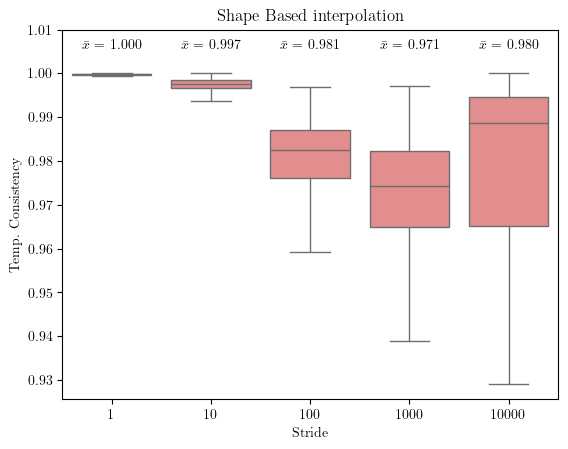

In [11]:
%matplotlib inline
import seaborn as sns
import matplotlib
matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})

# Create the boxplot
ax = sns.boxplot(x='Stride', y='Temp. Consistency', data=dfs["shape"], showfliers=False, color= 'lightcoral')

# Set the y-limit of the plot
ax.set_ylim([None,  dfs["shape"]['Temp. Consistency'].max() * 1.01]) 

ax.set_title('Shape Based interpolation')

# Calculate average for each group and annotate
for i, group in enumerate(dfs["shape"].groupby('Stride')):
    avg = group[1]['Temp. Consistency'].mean()
    # Place the mean value at the top of the box
    ax.annotate(r'$\bar{{x}}$ = {:.3f}'.format(avg), (i, dfs["shape"]['Temp. Consistency'].max() * 1.005), ha='center', va='bottom')
plt.show()



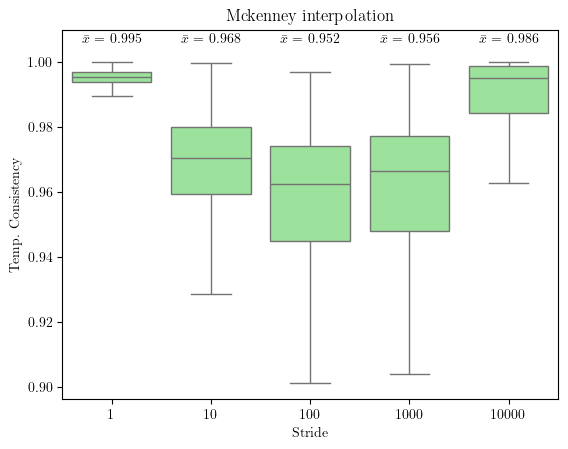

In [12]:
# Create the boxplot
ax = sns.boxplot(x='Stride', y='Temp. Consistency', data=dfs["pstg"], showfliers=False, color='lightgreen')

# Set the y-limit of the plot
ax.set_ylim([None,  dfs["pstg"]['Temp. Consistency'].max() * 1.01]) 

ax.set_title('Mckenney interpolation')

# Calculate average for each group and annotate
for i, group in enumerate(dfs["pstg"].groupby('Stride')):
    avg = group[1]['Temp. Consistency'].mean()
    # Place the mean value at the top of the box
    ax.annotate(r'$\bar{{x}}$ = {:.3f}'.format(avg), (i, dfs["pstg"]['Temp. Consistency'].max() * 1.005), ha='center', va='bottom')
plt.show()


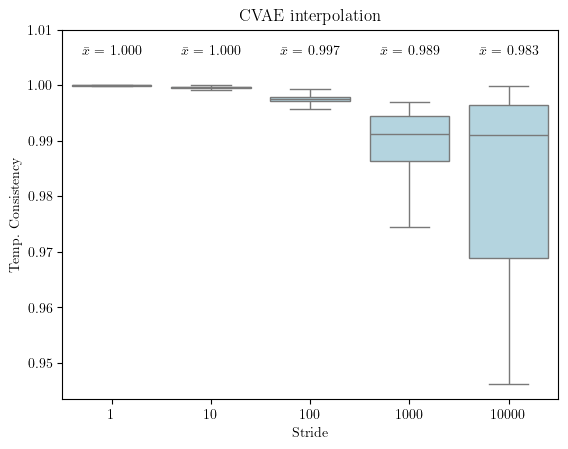

In [13]:
# Create the boxplot
ax = sns.boxplot(x='Stride', y='Temp. Consistency', data=dfs["CVAE"], showfliers=False,color='lightblue')

# Set the y-limit of the plot
ax.set_ylim([None,  dfs["CVAE"]['Temp. Consistency'].max() * 1.01]) 

ax.set_title('CVAE interpolation')

# Calculate average for each group and annotate
for i, group in enumerate(dfs["CVAE"].groupby('Stride')):
    avg = group[1]['Temp. Consistency'].mean()
    # Place the mean value at the top of the box
    ax.annotate(r'$\bar{{x}}$ = {:.3f}'.format(avg), (i, dfs["CVAE"]['Temp. Consistency'].max() * 1.005), ha='center', va='bottom')
plt.show()

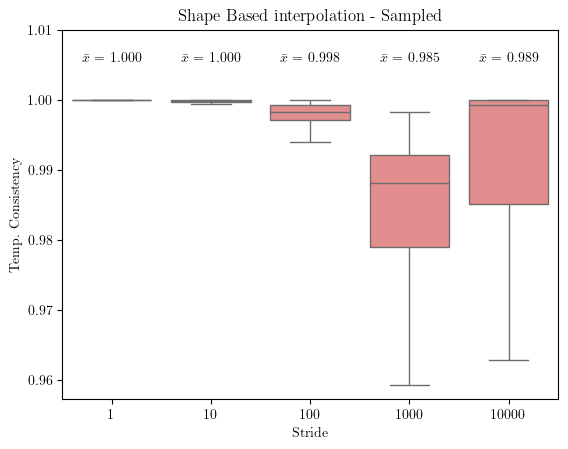

In [14]:
# Create the boxplot
ax = sns.boxplot(x='Stride', y='Temp. Consistency', data=dfs_sampled["shape"], showfliers=False, color= 'lightcoral')

# Set the y-limit of the plot
ax.set_ylim([None,  dfs_sampled["shape"]['Temp. Consistency'].max() * 1.01]) 

ax.set_title('Shape Based interpolation - Sampled')

# Calculate average for each group and annotate
for i, group in enumerate(dfs_sampled["shape"].groupby('Stride')):
    avg = group[1]['Temp. Consistency'].mean()
    # Place the mean value at the top of the box
    ax.annotate(r'$\bar{{x}}$ = {:.3f}'.format(avg), (i, dfs_sampled["shape"]['Temp. Consistency'].max() * 1.005), ha='center', va='bottom')
plt.show()

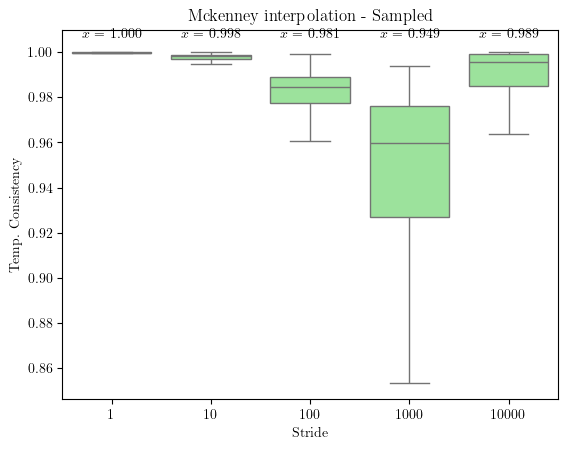

In [15]:
# Create the boxplot
ax = sns.boxplot(x='Stride', y='Temp. Consistency', data=dfs_sampled["pstg"], showfliers=False, color='lightgreen')

# Set the y-limit of the plot
ax.set_ylim([None,  dfs_sampled["pstg"]['Temp. Consistency'].max() * 1.01]) 

ax.set_title('Mckenney interpolation - Sampled')

# Calculate average for each group and annotate
for i, group in enumerate(dfs_sampled["pstg"].groupby('Stride')):
    avg = group[1]['Temp. Consistency'].mean()
    # Place the mean value at the top of the box
    ax.annotate(r'$\bar{{x}}$ = {:.3f}'.format(avg), (i, dfs_sampled["pstg"]['Temp. Consistency'].max() * 1.005), ha='center', va='bottom')
plt.show()



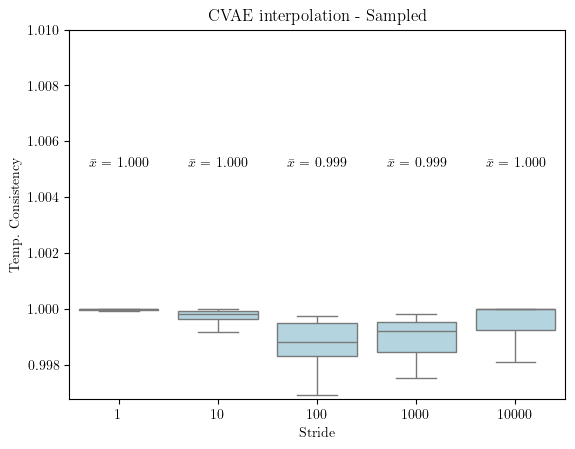

In [16]:
# Create the boxplot
ax = sns.boxplot(x='Stride', y='Temp. Consistency', data=dfs_sampled["CVAE"], showfliers=False,color='lightblue')

# Set the y-limit of the plot
ax.set_ylim([None,  dfs_sampled["CVAE"]['Temp. Consistency'].max() * 1.01]) 

ax.set_title('CVAE interpolation - Sampled')

# Calculate average for each group and annotate
for i, group in enumerate(dfs_sampled["CVAE"].groupby('Stride')):
    avg = group[1]['Temp. Consistency'].mean()
    # Place the mean value at the top of the box
    ax.annotate(r'$\bar{{x}}$ = {:.3f}'.format(avg), (i, dfs_sampled["CVAE"]['Temp. Consistency'].max() * 1.005), ha='center', va='bottom')
plt.show()

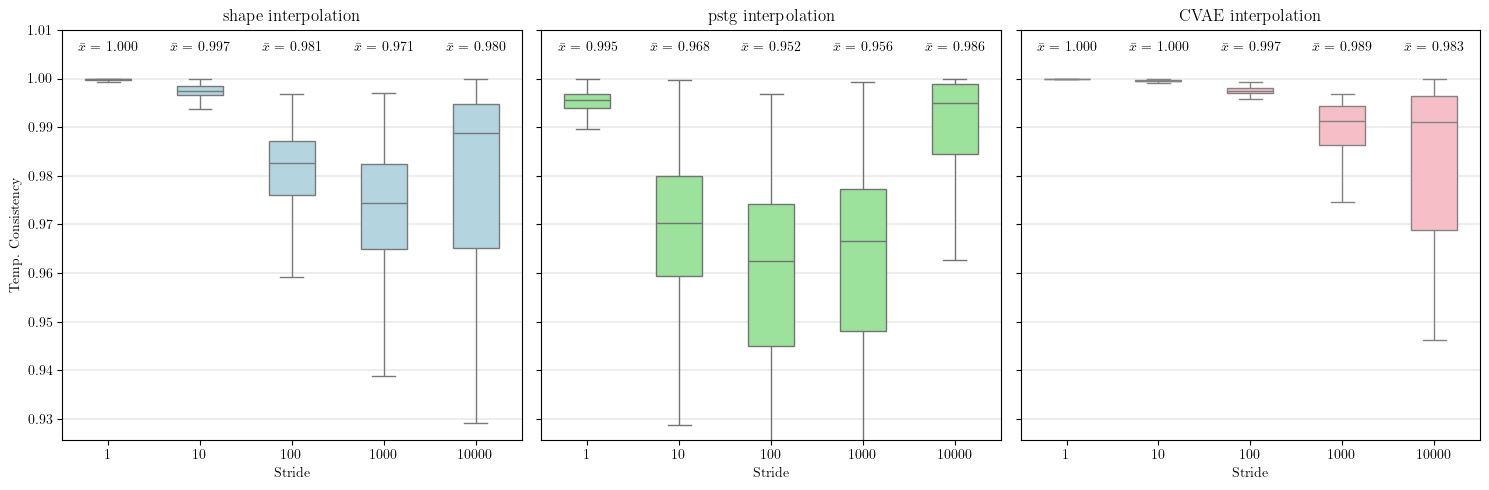

In [17]:
# Create a figure with 3 subplots, one for each model
fig, axs = plt.subplots(1, 3, sharey=True, figsize=(15, 5))

models = ['shape', 'pstg', 'CVAE']
colors = ['lightblue', 'lightgreen', 'lightpink']

for i, model in enumerate(models):
    # Create the boxplot with a smaller width
    ax = sns.boxplot(x='Stride', y='Temp. Consistency', data=dfs[model], showfliers=False, color=colors[i], ax=axs[i], width=0.5)

    # Set the y-limit of the plot
    ax.set_ylim([None,  dfs[model]['Temp. Consistency'].max() * 1.01]) 

    ax.set_title(f'{model} interpolation')

    # Calculate average for each group and annotate
    for j, group in enumerate(dfs[model].groupby('Stride')):
        avg = group[1]['Temp. Consistency'].mean()
        # Place the mean value at the top of the box
        ax.annotate(r'$\bar{{x}}$ = {:.3f}'.format(avg), (j, dfs[model]['Temp. Consistency'].max() * 1.005), ha='center', va='bottom')

    # Add a light horizontal grid
    ax.yaxis.grid(True, which='both', color='black', linewidth=0.1)
    ax.xaxis.grid(False)

plt.tight_layout()
plt.show()

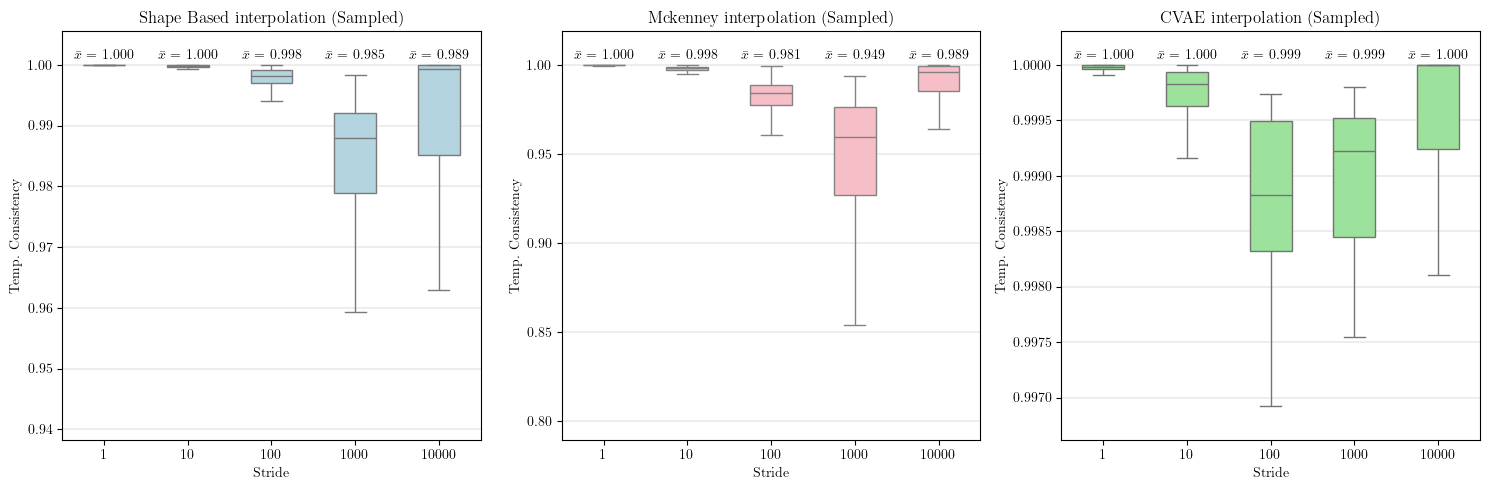

In [18]:
# Create a figure with 3 subplots, one for each model
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

models = ['shape', 'pstg', 'CVAE']
model_names = ['Shape Based', 'Mckenney', 'CVAE']
colors = ['lightblue', 'lightpink', 'lightgreen']

for i, model in enumerate(models):
    # Create the boxplot with a smaller width
    ax = sns.boxplot(x='Stride', y='Temp. Consistency', data=dfs_sampled[model], showfliers=False, color=colors[i], ax=axs[i], width=0.5)

    # Set the y-limit of the plot
    min_val = dfs_sampled[model]['Temp. Consistency'].min()
    max_val = dfs_sampled[model]['Temp. Consistency'].max()
    ax.set_ylim([min_val - 0.1 * (max_val - min_val),  min_val + 1.1 * (max_val - min_val)]) 
    ax.set_title(f'{model_names[i]} interpolation (Sampled)')

    # Calculate average for each group and annotate
    for j, group in enumerate(dfs_sampled[model].groupby('Stride')):
        avg = group[1]['Temp. Consistency'].mean()
        # Place the mean value at a fixed y-coordinate
        ax.annotate(r'$\bar{{x}}$ = {:.3f}'.format(avg), (j, min_val + 1.01 * (max_val - min_val)), ha='center', va='bottom')

    # Add a light horizontal grid
    ax.yaxis.grid(True, which='both', color='black', linewidth=0.1)
    ax.xaxis.grid(False)

plt.tight_layout()
plt.show()

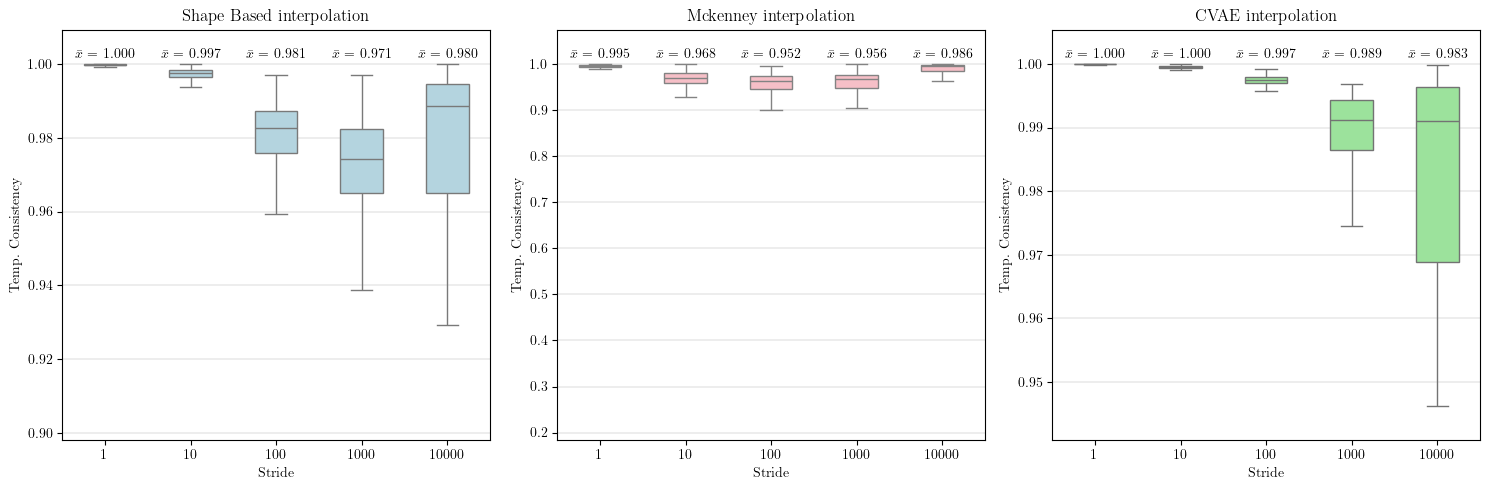

In [19]:
# Create a figure with 3 subplots, one for each model
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

models = ['shape', 'pstg', 'CVAE']
model_names = ['Shape Based', 'Mckenney', 'CVAE']
colors = ['lightblue', 'lightpink', 'lightgreen']

for i, model in enumerate(models):
    # Create the boxplot with a smaller width
    ax = sns.boxplot(x='Stride', y='Temp. Consistency', data=dfs[model], showfliers=False, color=colors[i], ax=axs[i], width=0.5)

    # Set the y-limit of the plot
    min_val = dfs[model]['Temp. Consistency'].min()
    max_val = dfs[model]['Temp. Consistency'].max()
    ax.set_ylim([min_val - 0.1 * (max_val - min_val),  min_val + 1.1 * (max_val - min_val)]) 
    ax.set_title(f'{model_names[i]} interpolation')

    # Calculate average for each group and annotate
    for j, group in enumerate(dfs[model].groupby('Stride')):
        avg = group[1]['Temp. Consistency'].mean()
        # Place the mean value at a fixed y-coordinate
        ax.annotate(r'$\bar{{x}}$ = {:.3f}'.format(avg), (j, min_val + 1.01 * (max_val - min_val)), ha='center', va='bottom')

    # Add a light horizontal grid
    ax.yaxis.grid(True, which='both', color='black', linewidth=0.1)
    ax.xaxis.grid(False)

plt.tight_layout()
plt.show()

In [73]:

def plot_models(dfs, title, subtitles):
    # Create a figure with 3 subplots, one for each model
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))

    models = list(dfs.keys())
    model_names = subtitles
    colors = ['lightblue', 'lightpink', 'lightgreen']

    # Define properties for the outlier points
    flierprops = dict(marker='.', markerfacecolor='whitesmoke', markersize=3, linestyle='none')

    for i, model in enumerate(models):
        # Create the boxplot with a smaller width
        ax = sns.boxplot(x='Stride', y='Temp. Consistency', data=dfs[model], showfliers=True, color=colors[i], ax=axs[i], width=0.5, flierprops=flierprops)

        # Set the y-limit of the plot
        min_val = dfs[model]['Temp. Consistency'].min()
        max_val = dfs[model]['Temp. Consistency'].max()
        ax.set_ylim([min_val - 0.1 * (max_val - min_val),  min_val + 1.1 * (max_val - min_val)]) 
        ax.set_title(f'{model_names[i]}')

        # Calculate average for each group and annotate
        for j, group in enumerate(dfs[model].groupby('Stride')):
            avg = group[1]['Temp. Consistency'].mean()
            # Place the mean value at a fixed y-coordinate
            ax.annotate(r'$\bar{{x}}$ = {:.3f}'.format(avg), (j, min_val + 1.01 * (max_val - min_val)), ha='center', va='bottom')

        # Add a light horizontal grid
        ax.yaxis.grid(True, which='both', color='black', linewidth=0.1)
        ax.xaxis.grid(False)
    # Add a title to the figure
    fig.suptitle(title, fontsize=16)
    plt.tight_layout()
    plt.show()

In [138]:
def plot_group_boxs(dfs, title):
    # Concatenate the dataframes and create a new column for the model
    data = pd.concat([df.assign(Series=model) for model, df in dfs.items()])

    # Create a figure
    fig, ax = plt.subplots(figsize=(15, 15))

    # Define properties for the outlier points
    flierprops = dict(
        marker=".", markerfacecolor="whitesmoke", markersize=3, linestyle="none"
    )

    colors = ["lightblue", "lightpink", "lightgreen"]

    # Define the order of the 'Series'
    series_order = [
        "sampled",
        "unet",
        "full",
    ]  

    # Create the boxplot
    sns.boxplot(
        x="Stride",
        y="Temp. Consistency",
        hue="Series",
        data=data,
        showfliers=True,
        ax=ax,
        width=0.8,
        flierprops=flierprops,
        fliersize=0.1,
        dodge=True,
        gap=0.15,
        palette=colors,
        hue_order=series_order,
    )

    # Set the y-limit of the plot
    min_val = data["Temp. Consistency"].min()
    max_val = data["Temp. Consistency"].max()
    ax.set_ylim(
        [min_val - 0.1 * (max_val - min_val), min_val + 1.1 * (max_val - min_val)]
    )

    # Add a light horizontal grid
    ax.yaxis.grid(True, which="both", color="black", linewidth=0.1)
    ax.xaxis.grid(False)

    # set legeng font size
    ax.legend(fontsize=12)
    # set axis labels font size
    ax.tick_params(axis="both", which="major", labelsize=15)
    # x and y axis labels font size
    ax.set_xlabel("Stride", fontsize=15)
    ax.set_ylabel("Temporal Consistency", fontsize=15)

    # Add a title to the figure
    fig.suptitle(title, fontsize=16)
    plt.tight_layout()
    plt.show()

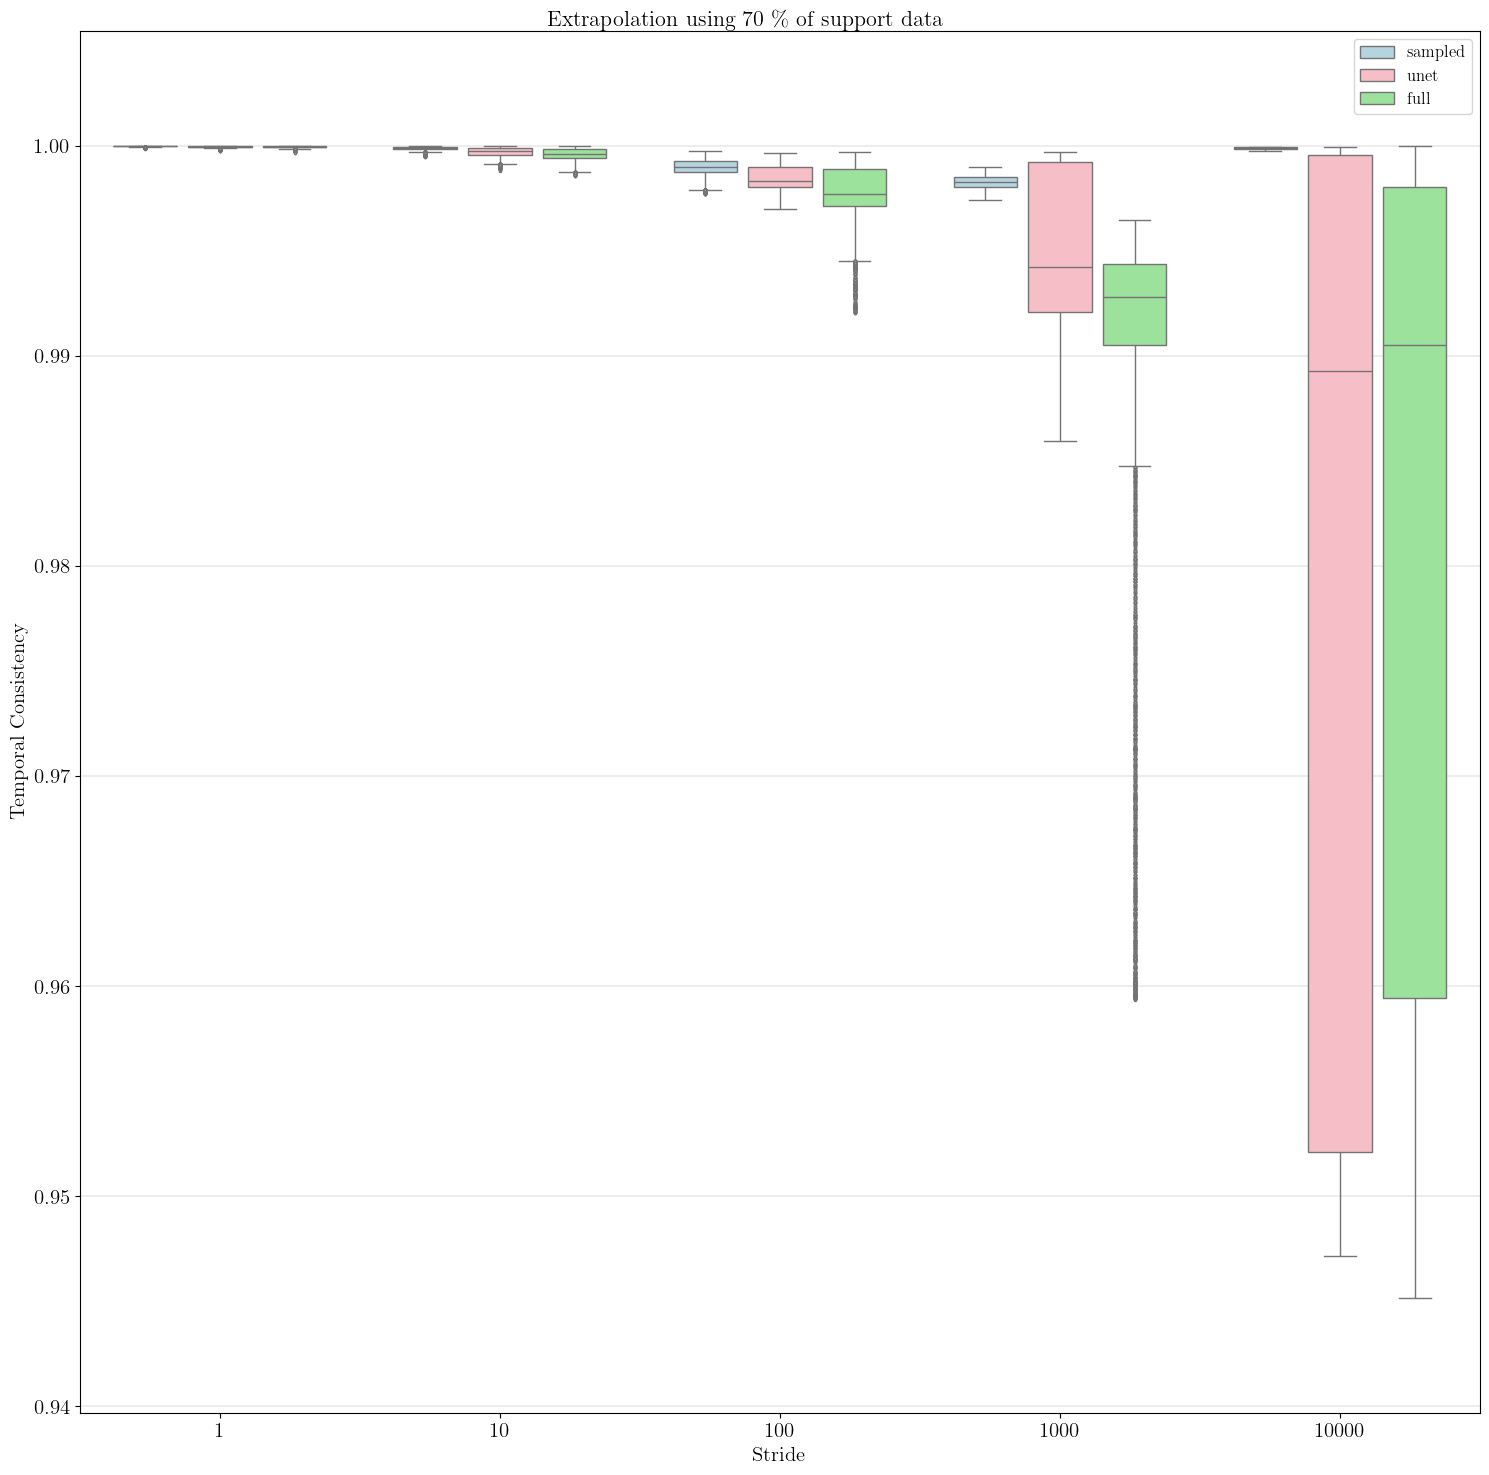

In [139]:
plot_group_boxs(dfs_ext_70, 'Extrapolation using 70 \% of support data')

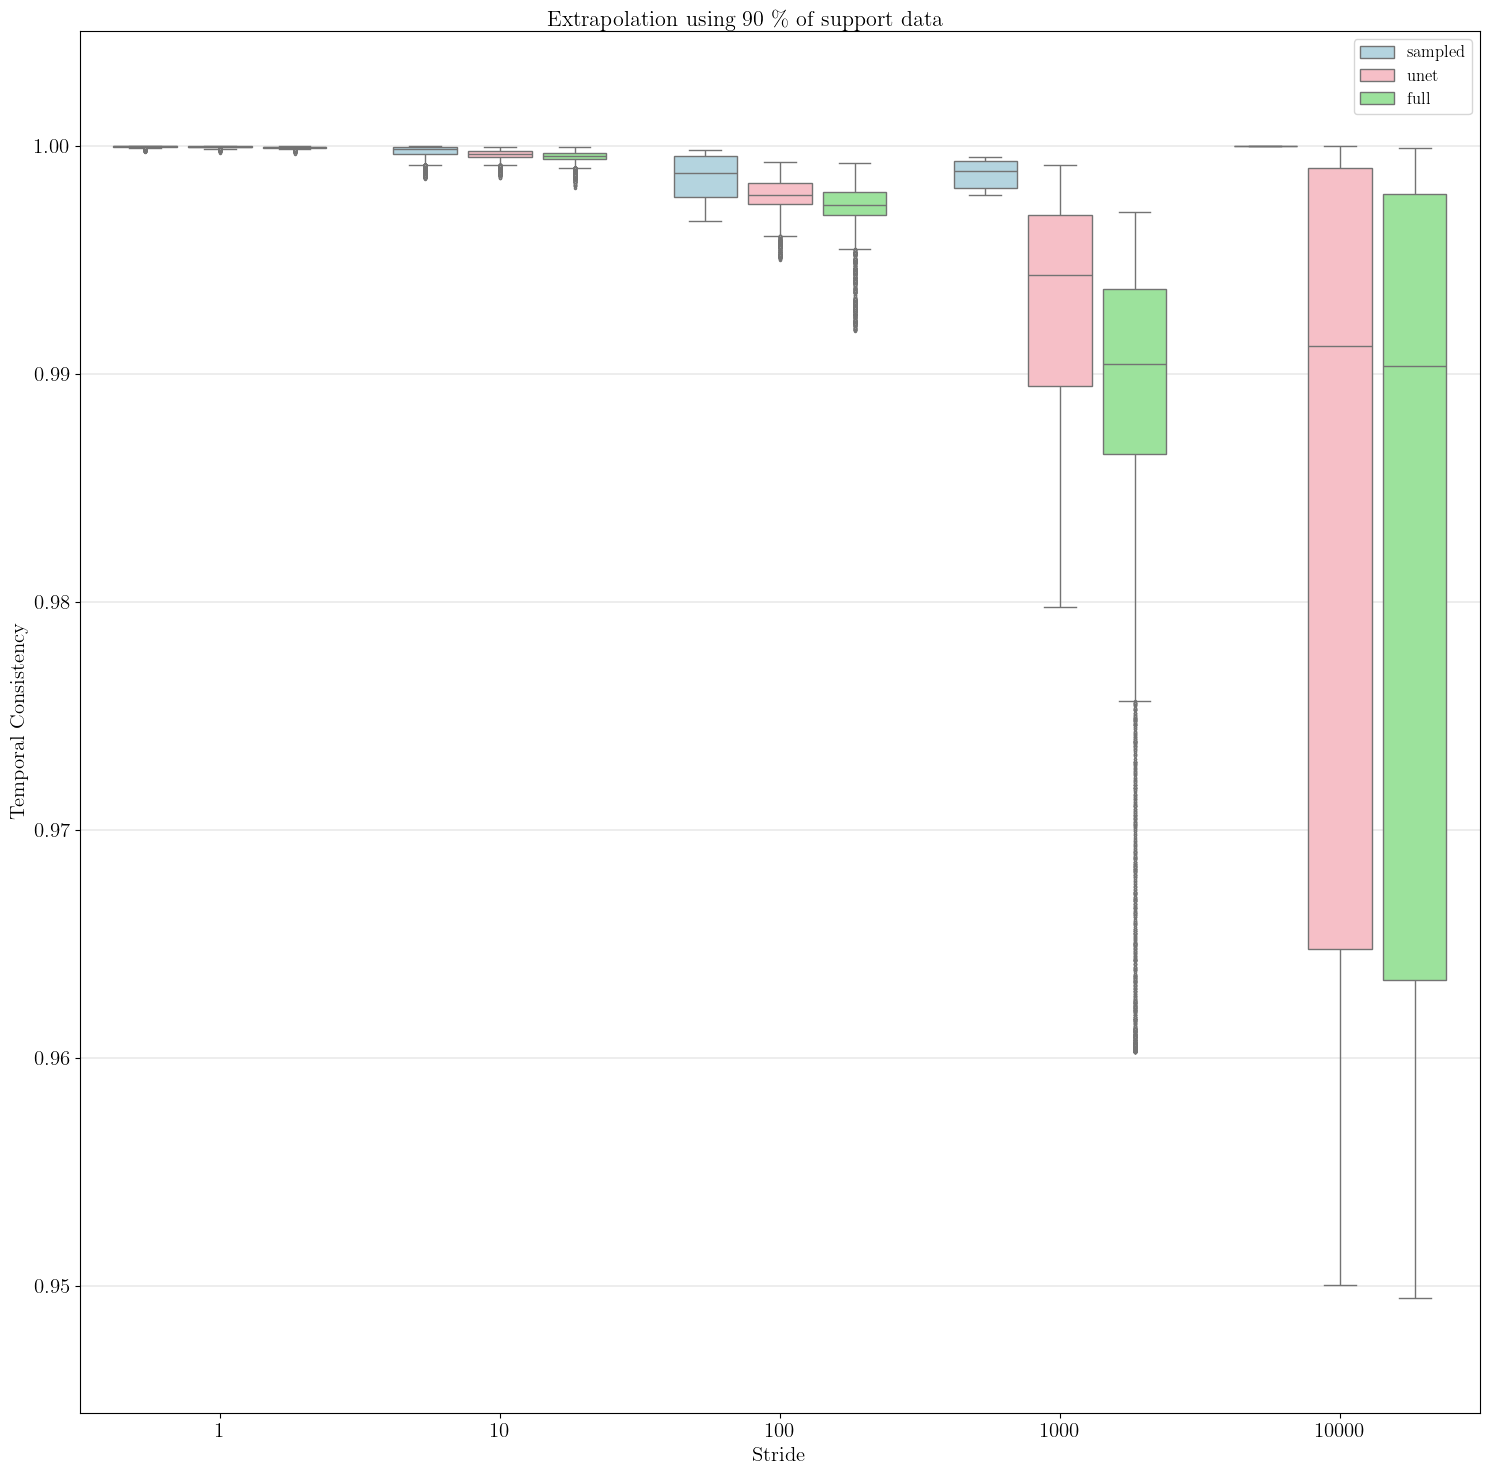

In [140]:
plot_group_boxs(dfs_ext_90, 'Extrapolation using 90 \% of support data')

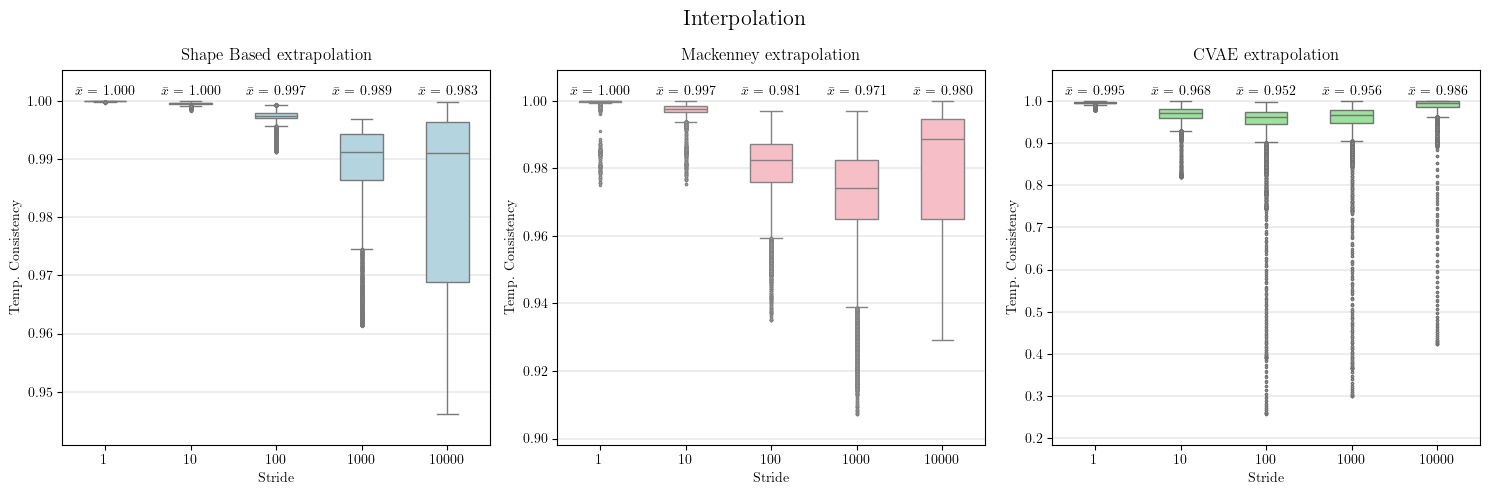

In [64]:
plot_models(dfs, 'Interpolation', ['Shape Based', 'Mackenney', 'CVAE'])

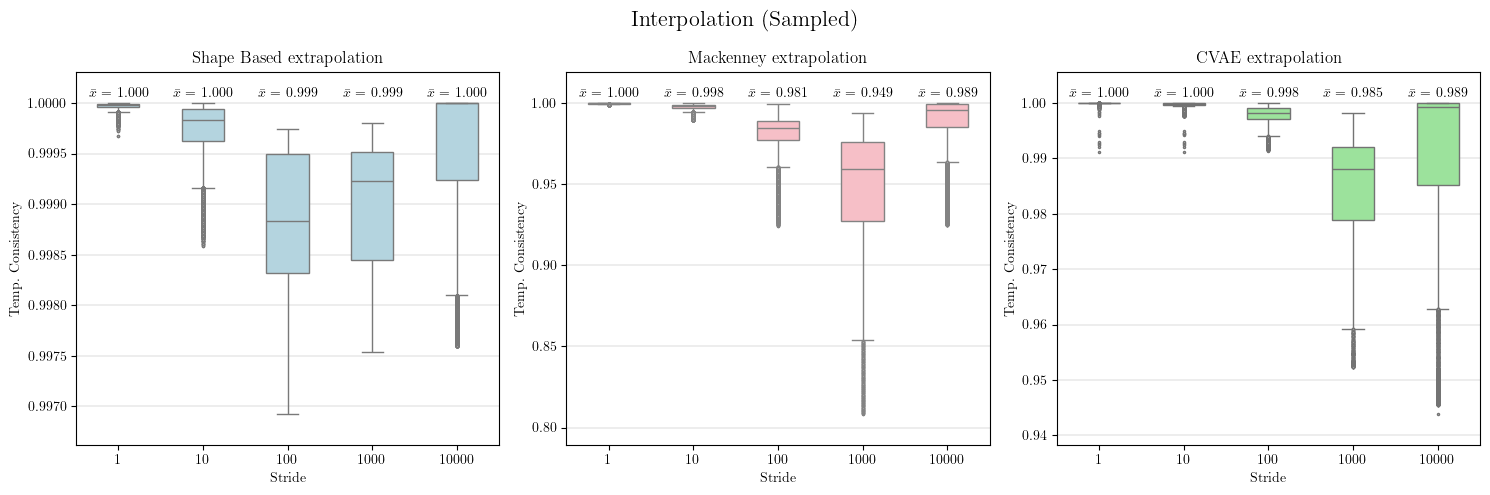

In [69]:
plot_models(dfs_sampled, 'Interpolation (Sampled)', ['Shape Based', 'Mackenney', 'CVAE'])